In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS

# <center> Multiple Linear Regression

In [4]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Load dataset from seaborn, you can also select other data set with sns.get_dataset_names()

In [10]:
df[['size','total_bill','tip']].describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


We want to see description from size, total bill and tip feature
* Count is the total of the data we have
* Mean is the average value for each features
* std (standard deviation) means :
>* higher value mean data more spread out, in this case the total bill is the data with the largest data distribution
* Min - Max Value means :
>* Size = the range of size is 1 to 6, meaning that the minimum number of visitors in 1 table is 1 person, and a maximum of 6 people
>* Total Bill = history of total paying customers for a meal at a restaurant starts from 3.07-50.81 dollars
>* tip = The number of tips given to waiters ranges from 1 - 10 dollars

In [11]:
df[['size','total_bill','tip']].corr()

,size,total_bill,tip
size,1.000000,0.598315,0.489299
total_bill,0.598315,1.000000,0.675734
tip,0.489299,0.675734,1.000000


to see the correlation value of the feature
here is the value have meaning :
* x < 0.3    = No correlation
* 0.3-0.5 = Low Correlation
* 0.5-0.8 = Medium Correlation
* x > 0.8    = Strong Correlation
* the + value means have positive relationship (linear line up)
* the - value means have negative relationship (linear line down)

based on the description above, the Correlation value between feature = 
1. size x total bill, have medium correlation and the value is positive, this means if size increase total bill increase too
2. size x tip, have low correlation and the value is positive, this means if size increase tip increase too, but not very significant
3. total bill x tip, have medium correlation and the value is positive, this means if total bill increase tip increase too

### <center> Data Visualization

Text(0.5, 1.0, 'regression plot of size and total bill')

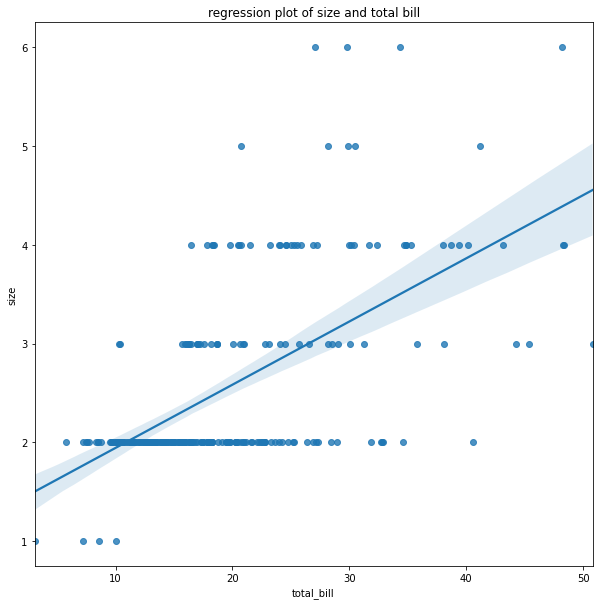

In [6]:
plt.figure(figsize = (10,10))
sns.regplot(x='total_bill',y='size', data = df)
plt.title('regression plot of size and total bill',)

Text(0.5, 1.0, 'regression plot of tip and size')

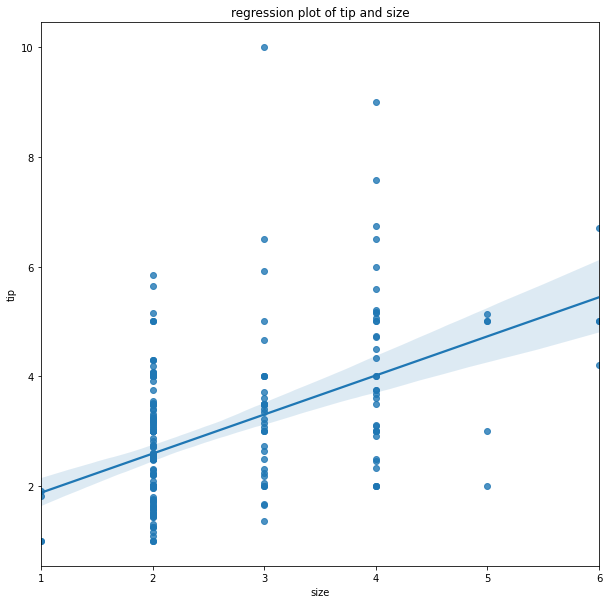

In [9]:
plt.figure(figsize = (10,10))
sns.regplot(x='size',y='tip', data = df)
plt.title('regression plot of tip and size')

Text(0.5, 1.0, 'regression plot of total bill and tip')

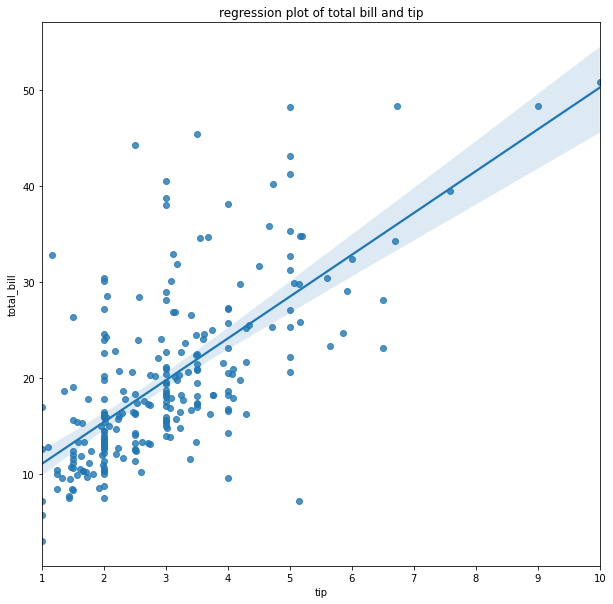

In [8]:
plt.figure(figsize = (10,10))
sns.regplot(x='tip',y='total_bill', data = df)
plt.title('regression plot of total bill and tip')

### <center>Another Visualization

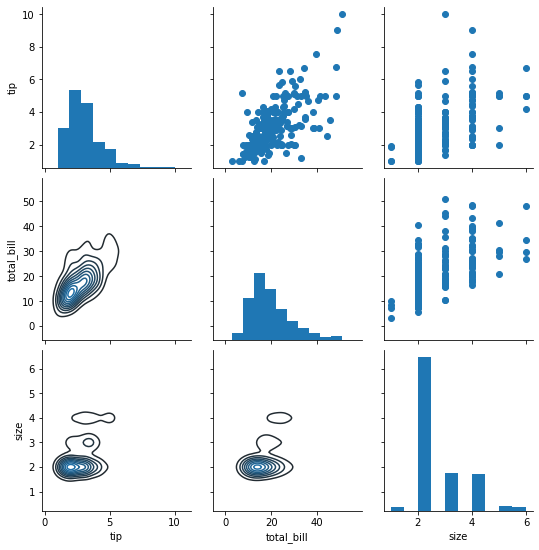

In [24]:
g = sns.PairGrid(df[['tip','total_bill','size']])

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

With this method we can visualize the features simultaneously with histogram, scatterplot, and kde plot

### <center> Modelling

In [11]:
sm_lm = OLS(df['tip'],sm.add_constant(df[['size','total_bill']]))
result = sm_lm.fit()

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           9.67e-34
Time:                        18:41:37   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

### Differences in readings of linear regression and multiple linear regression

The difference between the readings of linear regression and multiple linear regression in this case we have more than 1 feature so that to present the f_test we can say "it means that having enough evidence that one of our features between the total bill and size affects the size of the tips given"

if the feature is more than 1 then use the value **Adj. R-squared**, not R-squared

### <center> Penjabaran dari result summary

From the results above, the equation shows: Y = 0.6689 + 0.1926 X1 + 0.0927 X2
* F-test: has a value (9.67e-34) <0.05, meaning that it has sufficient evidence that one of our features between the total bill and size affects the size of the tips given
* Partial test / T-test:
> * Constanta <0.05 for both the size and the total bill, none of which has a value = 0, so the constant is irrelevant
> * size <0.05 means that the greater the size value the bigger the tip is given, for every 1 person who adds to the size the tip value will increase by 0.1926 (it is recommended to predict in the size range 1-6)
> * total_bill <0.05 means that the larger the total bill the more tips are given, for every 1 dollar increase the total bill value given will increase by 0.0927 dollars (recommended to predict in the size range 3-50)

Adjusted R-Squared (Coefficient Determination): this model is able to explain 46.3% of the variance of the tip data